# Demo

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from data_synthesizer.synthesizer import generate, LABELS

In [2]:
input_shape=(128,416)
anchors = np.array([[59, 23], [74, 28], [79, 47], [89, 22], [96, 32], [118, 58], [124, 39], [125, 22], [58, 36]])

We generate randomly 10 image data by calling the function generate(n=10)

In [3]:
images, df = generate(100)

This is how a generated image looks like

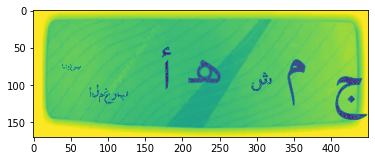

In [5]:
plt.imshow(images[0])

during training, we apply random transformations to the images (blur, noise, perspectives, rotations), at the same time we apply the same transformations to the bounding boxes.

Here is an exaple of a random transformation

laels: 
 [[ 72. 321. 109. 349.  16.]
 [ 45. 203.  83. 223.  18.]
 [ 61. 146. 110. 184.  19.]
 [ 33. 224.  98. 261.  21.]
 [ 33. 126.  89. 149.  19.]
 [ 42. 266. 109. 293.  12.]
 [ 58. 284.  97. 321.  13.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
image: 



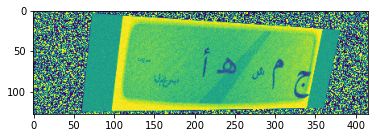

In [9]:
from yolo3.utils import get_random_data

im,b=get_random_data(images, df, 0, input_shape, max_boxes=12)
print('laels: \n',b)
print('image: \n')
plt.imshow(im)

# Train your model

You can train your model by calling train providing your images and labels (df).

In [11]:
from yolo3.main import train

model=train(images, df, save=False)

# Load your models and start predicting

you can download my trained models in this link https://www.kaggle.com/taoufikelkhaouja/yolo-weights-final
that works for the moroccan licence plate

In [12]:
from yolo3.main import create_model
from yolo3.model import yolo_eval

In [14]:
#Loading the plate detection model:
net = cv2.dnn.readNet('C:/Users/User/Desktop/YOLO3/yolov3_plates_final.weights',
                      'C:/Users/User/Desktop/YOLO3/yolov3-license-plates.cfg')
plate_finder = cv2.dnn_DetectionModel(net)
plate_finder.setInputParams(size=(832,832),scale=1/255)


def get_plate(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(832,832))
    (c,s,b)=plate_finder.detect(img)
    n = np.argmax(s)
    img = img[b[n,1]-int(b[n,3]*0.3):b[n,1]+int(b[n,3]*1.1),
              b[n,0]-int(b[n,2]*0.3):b[n,0]+int(b[n,2]*1.1)]
    return cv2.resize(img,(416,128))

#Loading the charachter detection model
num_classes=22
model = create_model(anchors, num_classes)
model.load_weights('C:/Users/User/Desktop/YOLO3/model/yolo_for_characters')

#plate detection
img = get_plate(r'C:\Users\User\Desktop\git-repos\PLATE_CHARACHTER_DETECTION\images\car.jpg')

#charachter detection
img0 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convet img to grayscale
yolo_outputs = model(np.array([img0/300]) )
boxes_, scores_, classes_ = yolo_eval(yolo_outputs,
              anchors,
              num_classes,
              input_shape,
              max_boxes=12,
              score_threshold=.5,
              iou_threshold=.5)


Create YOLOv3 model with 9 anchors and 22 classes.


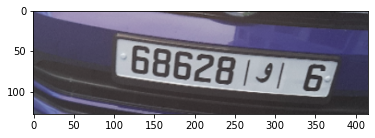

In [15]:
plt.imshow(img)

In [16]:
for i in range(len(scores_)) :
    b=boxes_[i]
    c=classes_[i]
    s=scores_[i]
    print(LABELS[int(c)])
    img = cv2.putText(img,LABELS[int(c)] , (int(b[1]),int(b[0])), cv2.FONT_HERSHEY_PLAIN,3,(0,250,250))
    img = cv2.rectangle(img, (int(b[1]),int(b[0])), (int(b[3]),int(b[2])), (255,0,0), 3)

2
6
6
6
8
8
و


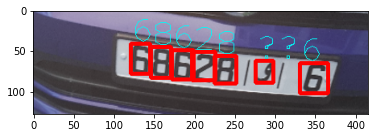

In [17]:
plt.imshow(img)